# Assignment 2 - Supervised Learning

# 1. Import and store the data in a data frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

air = pd.read_csv('./airq402.csv')
air.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [2]:
# Renaming the column names because column names are same for multiple columns
air.rename(columns={'market leading airline':'Market leading airline',
'market share':'Market share - leading',
'Average fare':'Average fare - leading',
'market share.1':'Market share - low price',
'Price':'Average fare - low price'}, inplace=True)
air.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,Market leading airline,Market share - leading,Average fare - leading,Low price airline,Market share - low price,Average fare - low price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
# checking whether data has null values or not
air[air.isna().any(axis=1)]

,City1,City2,Average Fare,Distance,Average weekly passengers,Market leading airline,Market share - leading,Average fare - leading,Low price airline,Market share - low price,Average fare - low price


In [4]:
# dropping the categorical Columns
air = air.drop(['City1','City2','Market leading airline','Low price airline'], axis=1)
air.head()

,Average Fare,Distance,Average weekly passengers,Market share - leading,Average fare - leading,Market share - low price,Average fare - low price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


# 2. Remove the outliers from the data

In [5]:
air.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Market share - leading,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare - leading,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Market share - low price,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Average fare - low price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


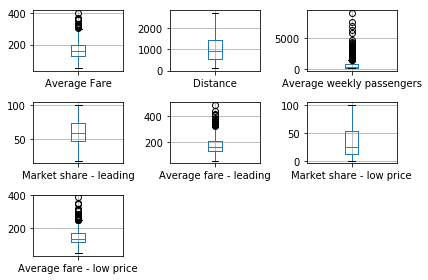

In [6]:
# plotting boxplot to check the outliers

fig, axes = plt.subplots(3,3) # create figure and axes

for i,el in enumerate(list(air.columns.values)[:]):
    a = air.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[2,1]) # remove empty subplot
fig.delaxes(axes[2,2]) # remove empty subplot
plt.tight_layout() 
plt.show()

In [7]:
# Removing outliers and assigning it to new dataframe

Q1 = air.quantile(0.25)
Q3 = air.quantile(0.75)
IQR = Q3 - Q1

air_new = air[~((air < (Q1 - 1.5 * IQR)) |(air > (Q3 + 1.5 * IQR))).any(axis=1)]

print(air.shape)
print('Without outliers {}'.format(air_new.shape))

air_new.describe().T

(1000, 7)
Without outliers (885, 7)


,count,mean,std,min,25%,50%,75%,max
Average Fare,885.0,160.292068,48.468895,50.52,126.60,160.71,194.05,288.58
Distance,885.0,1039.383051,615.224361,108.00,564.00,914.00,1381.00,2724.00
Average weekly passengers,885.0,499.132644,327.573566,181.41,249.02,372.93,644.56,1519.89
Market share - leading,885.0,60.636938,19.361447,17.68,47.02,59.75,74.66,100.00
Average fare - leading,885.0,162.589051,53.288002,50.52,125.59,160.74,198.47,315.86
Market share - low price,885.0,34.373028,27.183305,1.06,13.06,26.25,52.93,100.00
Average fare - low price,885.0,140.431073,39.849789,50.52,115.11,138.02,166.26,250.02


# Q3 & Q4

In [8]:
X = air_new.drop('Average Fare', axis=1) 
Y = air_new[['Average Fare']]

In [9]:
# Finding the correlation Between Dependent Variable and Independent Variable
air_corr = air_new.corr()
air_corr.loc['Average Fare','Distance':]

Distance                     0.522650
Average weekly passengers   -0.197005
Market share - leading      -0.207955
Average fare - leading       0.979713
Market share - low price    -0.493555
Average fare - low price     0.840993
Name: Average Fare, dtype: float64

# Scenario 1 - Considering .1 as positive and negative correlation, there is no Independent variables which is between -0.1 and +0.1

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

print("Scenario 1:\n")
print(f'Training score: {regression_model.score(X_train, Y_train)}')
print(f'Test score: {regression_model.score(X_test, Y_test)}\n')

# coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
# intercept for the model
intercept = regression_model.intercept_[0]

print("\nThe intercept for our model is {}".format(intercept))

Scenario 1:

Training score: 0.9709803472467778
Test score: 0.974344519423167

The coefficient for Distance is 0.002698587969232818
The coefficient for Average weekly passengers is -0.00367292537359392
The coefficient for Market share - leading is 0.07893130482596357
The coefficient for Average fare - leading is 0.7366228373581053
The coefficient for Market share - low price is -0.028513579082319312
The coefficient for Average fare - low price is 0.22528413482475854

The intercept for our model is 3.912425648539738


# Scenario 2 - Considering .1 as only positive correlation

In [11]:
# Average weekly passengers, Market share - leading and Market share - low price has correlation less than .1 
# with dependent Variable
# Copying all independent variables to X 
X = X.drop(['Average weekly passengers','Market share - leading','Market share - low price'], axis=1)

print("Scenario 2:")
print(f"X Shape = {X.shape} Y Shape = {Y.shape}")

Scenario 2:
X Shape = (885, 3) Y Shape = (885, 1)


#  5. Scatter Plot of Independent Variable vs Dependent Variable.

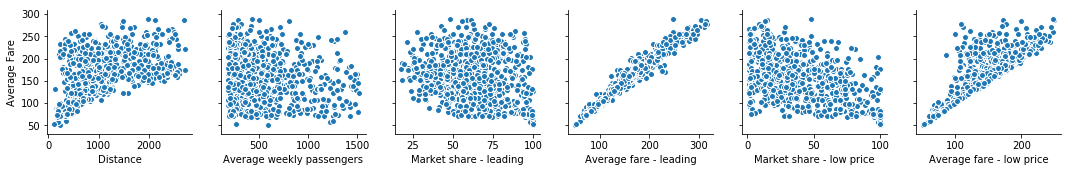

In [12]:
# pair plot to understand the relation ship between Average Fare and all other columns
air_new_attr = air_new.iloc[:, 0:10]

sns.pairplot(air_new_attr, 
             x_vars=['Distance','Average weekly passengers','Market share - leading','Average fare - leading',
                     'Market share - low price','Average fare - low price'],
             y_vars=['Average Fare'], diag_kind='kde')

# air_new_attr = air_new.iloc[:, 0:10]
# sns.pairplot(air_new_attr, x_vars=X.columns, y_vars=Y.columns, diag_kind='kde')

# 6. Dividing  the data set into training and test data set and building a Multiple Linear Regression model for Scenario 2

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)
print(f"X_Train Shape = {X_train.shape} Y_Train Shape = {Y_train.shape}")
print(f"X_Test Shape = {X_test.shape} Y_Test Shape = {Y_test.shape}\n")

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

print(f'Training score: {regression_model.score(X_train, Y_train)}')
print(f'Test score: {regression_model.score(X_test, Y_test)}')

X_Train Shape = (619, 3) Y_Train Shape = (619, 1)
X_Test Shape = (266, 3) Y_Test Shape = (266, 1)

Training score: 0.9695547782563688
Test score: 0.9739225973080645


# 7. Coefficient and Intercept of Linear Model for Scenario 2

In [14]:
# coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0016617876065931519
The coefficient for Average fare - leading is 0.7555063053685087
The coefficient for Average fare - low price is 0.2119699425833675


In [15]:
# intercept for the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.742633660744161
